<a href="https://colab.research.google.com/github/AlfAnalyst/study-projects-data-science-and-analysis/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2_20_%D1%80%D1%83%D1%81%D1%81%D0%BA%D0%B8%D1%85_%D0%BF%D0%B8%D1%81%D0%B0%D1%82%D0%B5%D0%BB%D0%B5%D0%B9_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задача:

Создать нейросеть, которая будет верно классифицировать произведения 20-ти русских писателей.

 В задании необходимо выполнить следующие пункты:

  1. Загрузить саму базу по ссылке и подговить файлы базы для обработки.
  2. Создать обучающую и проверочную выборки, обратив особое внимание на балансировку базы: количество примеров каждого класса должно быть примерно одного порядка. При этом для разбивки необходимо применить цикл. Проверочная выборка должна быть 20% от общей выборки.
  3. Подготовьте выборки для обучения и обучите сеть. Добейтесь результата точности сети не менее 95% на проверочной выборке модели Bag of Words и 75-80% - для модели Embedding.
   


In [ ]:
# Загрузка библиотек.
import random                                                                   # Для генерации случайных чисел. 
import numpy as np                                                              # Для работы с массивами.
import os                                                                       # Для работы с файлами.
import gdown                                                                    # Для загрузки базы с картинками.
import matplotlib.pyplot as plt                                                 # Для отрисовки графиков.

from tensorflow.keras import utils                                              # Утилиты для to_categorical.
from tensorflow.keras.models import Sequential                                  # Для создания модели нейросети.
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Flatten, Embedding, SpatialDropout1D        # Для создания слоев.
from tensorflow.keras.optimizers import Adam                                    # Оптимизатор.

from tensorflow.keras.preprocessing.text import Tokenizer                       # Для работы с текстами и преобразования их в последовательности.

from sklearn.model_selection import train_test_split                            # Для разбиения на выборки.
from sklearn.metrics import confusion_matrix                                    # Матрицы ошибок классификатора.

from seaborn import set_style                                                   # Для отрисовки сетки.
set_style('whitegrid')


## Загрузка данных

In [ ]:
import gdown                                                                    # Подключим функцию gdown
file_id = '1TeJxgfr2ZEY5Elil7XgM8WW7njI9Toqj'                                   # Обозначим ID файла в рамках ссылки
file_name = 'writers.zip'                                                       # Обозначим имя архива с базой
path = 'https://drive.google.com/uc?id='+file_id                                # Укажем директорию для скачивания: ссылка на гугл-диск + ID файла
gdown.download(path, file_name, quiet=False)                                    # Скачивание файла

Downloading...
From: https://drive.google.com/uc?id=1TeJxgfr2ZEY5Elil7XgM8WW7njI9Toqj
To: /content/writers.zip
100%|██████████| 28.5M/28.5M [00:00<00:00, 57.3MB/s]


'writers.zip'

In [ ]:
# Распакуем архив.
!unzip -q writers.zip

writers/Русские писатели/:  mismatching "local" filename (writers/╨а╤Г╤Б╤Б╨║╨╕╨╡ ╨┐╨╕╤Б╨░╤В╨╡╨╗╨╕/),
         continuing with "central" filename version
writers/Русские писатели/Беляев.txt:  mismatching "local" filename (writers/╨а╤Г╤Б╤Б╨║╨╕╨╡ ╨┐╨╕╤Б╨░╤В╨╡╨╗╨╕/╨С╨╡╨╗╤П╨╡╨▓.txt),
         continuing with "central" filename version
writers/Русские писатели/Булгаков.txt:  mismatching "local" filename (writers/╨а╤Г╤Б╤Б╨║╨╕╨╡ ╨┐╨╕╤Б╨░╤В╨╡╨╗╨╕/╨С╤Г╨╗╨│╨░╨║╨╛╨▓.txt),
         continuing with "central" filename version
writers/Русские писатели/Васильев.txt:  mismatching "local" filename (writers/╨а╤Г╤Б╤Б╨║╨╕╨╡ ╨┐╨╕╤Б╨░╤В╨╡╨╗╨╕/╨Т╨░╤Б╨╕╨╗╤М╨╡╨▓.txt),
         continuing with "central" filename version
writers/Русские писатели/Гоголь.txt:  mismatching "local" filename (writers/╨а╤Г╤Б╤Б╨║╨╕╨╡ ╨┐╨╕╤Б╨░╤В╨╡╨╗╨╕/╨У╨╛╨│╨╛╨╗╤М.txt),
         continuing with "central" filename version
writers/Русские писатели/Гончаров.txt:  mismatching "local" filename (writers/╨а╤Г╤Б╤Б╨║╨╕╨╡ ╨┐╨╕╤Б╨░╤В╨╡╨╗╨╕/╨У╨╛╨╜╤З╨

In [ ]:
!ls writers/Русские\ писатели                                                   # Посмотрим на содержимое папки.                                                       # Посмотрим на содержимое папки.

Беляев.txt    Гончаров.txt     Каверин.txt    Лесков.txt     Толстой.txt
Булгаков.txt  Горький.txt      Катаев.txt     Носов.txt      Тургенев.txt
Васильев.txt  Грибоедов.txt    Куприн.txt     Пастернак.txt  Чехов.txt
Гоголь.txt    Достоевский.txt  Лермонтов.txt  Пушкин.txt     Шолохов.txt


In [ ]:
texts_path = f'writers/Русские писатели/'                                       # Путь к файлам.

In [ ]:
files_list = sorted(os.listdir(texts_path))                                     # Получаем список файлов.
print('Список файлов:')
files_list

Список файлов:


['Беляев.txt',
 'Булгаков.txt',
 'Васильев.txt',
 'Гоголь.txt',
 'Гончаров.txt',
 'Горький.txt',
 'Грибоедов.txt',
 'Достоевский.txt',
 'Каверин.txt',
 'Катаев.txt',
 'Куприн.txt',
 'Лермонтов.txt',
 'Лесков.txt',
 'Носов.txt',
 'Пастернак.txt',
 'Пушкин.txt',
 'Толстой.txt',
 'Тургенев.txt',
 'Чехов.txt',
 'Шолохов.txt']

In [ ]:
# Подготовим пустые списки.
class_list = []                                                                 # Список классов.
text_train = []                                                                 # Для обучающей выборки.
text_test = []                                                                  # Для проверочной выборки.

In [ ]:
coef_split = 0.8                                                                # Коэффициент для отделения обучающей выборки.

In [ ]:
 # В цикле сформируем обучающую и проверочную выборки.

for file in files_list:
  m = file.split('.')                                                           # Разделяем по символу "." чтобы получить имя класса.
  class_name = m[0]                                                             # Имя класса.

  if file:
    if class_name not in class_list:                                            # Если имени класса еще нет в списке, добавляем его в список.
      print(f'Добавление класса "{class_name}"')
      class_list.append(class_name)

      cls = class_list.index(class_name)
      print(f'Добавление файла "{file}" в класс "{class_list[cls]}"')

      with open(f'writers/Русские писатели/{file}', 'r') as f:                    # Открываем файл для чтения.
        text = f.read()
        text = text.replace('\n', ' ').split(' ')                                 # Все символы веревода строк заменяем на пробелы.
        text_len = len(text)                                                      # Находим количество слов.
        text_train.append(' '.join(text[:int(text_len * coef_split)]))            # Отделяем обучающую выборку.
        text_test.append(' '.join(text[int(text_len * coef_split):]))             # Отделяем проверочную выборку.

Добавление класса "Беляев"
Добавление файла "Беляев.txt" в класс "Беляев"
Добавление класса "Булгаков"
Добавление файла "Булгаков.txt" в класс "Булгаков"
Добавление класса "Васильев"
Добавление файла "Васильев.txt" в класс "Васильев"
Добавление класса "Гоголь"
Добавление файла "Гоголь.txt" в класс "Гоголь"
Добавление класса "Гончаров"
Добавление файла "Гончаров.txt" в класс "Гончаров"
Добавление класса "Горький"
Добавление файла "Горький.txt" в класс "Горький"
Добавление класса "Грибоедов"
Добавление файла "Грибоедов.txt" в класс "Грибоедов"
Добавление класса "Достоевский"
Добавление файла "Достоевский.txt" в класс "Достоевский"
Добавление класса "Каверин"
Добавление файла "Каверин.txt" в класс "Каверин"
Добавление класса "Катаев"
Добавление файла "Катаев.txt" в класс "Катаев"
Добавление класса "Куприн"
Добавление файла "Куприн.txt" в класс "Куприн"
Добавление класса "Лермонтов"
Добавление файла "Лермонтов.txt" в класс "Лермонтов"
Добавление класса "Лесков"
Добавление файла "Лесков.txt

In [ ]:
class_count = len(class_list)
print(f'Количество классов: {class_count}')

Количество классов: 20


In [ ]:
# Оценим обучающую и тестовую выборки.
for cls in range(class_count):
  print(f'Писатель: {class_list[cls]}')
  print(f'~~ обучающий текст  : {text_train[cls][:100]}')
  print(f'~~ проверочный текст: {text_test[cls][:100]}')
  print()

Писатель: Беляев
~~ обучающий текст  : Часть первая  I. На палубе   Большой трансатлантический пароход «Вениамин Франклин» стоял в генуэзск
~~ проверочный текст:  Штирнер хмурился.  – И я подумала: как хорошо, что мы любим друг друга свободно и что мы счастливы!

Писатель: Булгаков
~~ обучающий текст  : Черновики романа. Тетрадь 1 1928 - 1929 гг. РАЗГОВОР ПО ДУШАМ - Значит, гражданин Поротый, две тысяч
~~ проверочный текст: Ты помер, скажем, к примеру, какая разница. Какая разница, ответь мне, гражданин?   - Не обижайте!  

Писатель: Васильев
~~ обучающий текст  : А зори здесь тихие…1  В списках не значилсяЧасть первая1   На 171-м разъезде уцелело двенадцать двор
~~ проверочный текст: ещё не настало.  — Передайте Чогдару, что Плоскиня и его брод-ники должны атаковать половцев только 

Писатель: Гоголь
~~ обучающий текст  : Гоголь Николай Васильевич. Мертвые души. Поэма.  We may guess that it was a pretty apt expression, s
~~ проверочный текст: глаза на какую-нибудь безделицу и рассматр

In [ ]:
# Используем Tokenizer для преобразования текстовых данных.

max_words_count1 = 10000                                                        # Максимальное количество слов используемое нейросетью для обучения.

filters = '!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff'                 # Исключаемые символы.
oov_token = 'неведомое слово'

tokenizer = Tokenizer(num_words=max_words_count1, filters=filters,
                      lower=True, split=' ',
                      char_level=False, oov_token=oov_token)

tokenizer.fit_on_texts(text_train)                                              # Создаем словарь частотности.

# Преобразуем тексты в последовательности индексов.

train_seq = tokenizer.texts_to_sequences(text_train)
test_seq = tokenizer.texts_to_sequences(text_test)

# Создание словаря.
items = list(tokenizer.word_index.items())
print(f'Размер словаря: {len(items)}')


Размер словаря: 318103


In [ ]:
print('Статистика собранных слов:')
for cls in range(len(class_list)):
  print(f'{class_list[cls]}: {len(train_seq[cls])} слов.')

Статистика собранных слов:
Беляев: 269640 слов.
Булгаков: 240825 слов.
Васильев: 355641 слов.
Гоголь: 243378 слов.
Гончаров: 390198 слов.
Горький: 326594 слов.
Грибоедов: 122170 слов.
Достоевский: 652425 слов.
Каверин: 245670 слов.
Катаев: 301965 слов.
Куприн: 283002 слов.
Лермонтов: 248390 слов.
Лесков: 269870 слов.
Носов: 300382 слов.
Пастернак: 360889 слов.
Пушкин: 413961 слов.
Толстой: 415441 слов.
Тургенев: 245657 слов.
Чехов: 834003 слов.
Шолохов: 402138 слов.


In [ ]:
#Формирование обучающей и тестовой выборок.
win_size = 1000
step = 100

In [ ]:
# Функция разбиения последовательности на отрезки скользящим окном.
def split_sequence(sequence, win_size, step):
  return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size + 1, step)]

In [ ]:
# Функция формирования выборок из последовательностей индексов.
def vectorize_sequence(seq_list, win_size, step):

  cls_count = len(seq_list)

  x, y = [], []

  for cls in range(cls_count):
    vectors = split_sequence(seq_list[cls], win_size, step)

    x += vectors
    y += [utils.to_categorical(cls, cls_count)] * len(vectors)

  return np.array(x), np.array(y)


In [ ]:
# Создаем обучающую выборку.
x_train, y_train = vectorize_sequence(train_seq, win_size, step)
print(f'Размерности обучающей выборки: {x_train.shape} и {y_train.shape}')

Размерности обучающей выборки: (69031, 1000) и (69031, 20)


In [ ]:
# Создаем тестовую выборку.
x_test, y_test = vectorize_sequence(test_seq, win_size, step)
print(f'Размерности тестовой выборки: {x_test.shape} и {y_test.shape}')

Размерности тестовой выборки: (17274, 1000) и (17274, 20)


In [ ]:
# Функция для компиляции модели и построения графиков.
def compile_model(model, x_train, y_train, x_val, y_val, epochs, batch_size, title):

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose=1)

  val_acc = round(history.history['val_accuracy'][-1], 3) * 100

  print()
  print(f'Точность на проверочной выборке на последней эпохе: {val_acc}%')

  #Вывод графиков.
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
  fig.suptitle('График обучения модели ' + title)

  ax1.plot(history.history['accuracy'], label='Доля верных ответов на обучающей выборке')
  ax1.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочной выборке')
  ax1.set_xlabel('Эпохи обучения')
  ax1.set_ylabel('Доля верных ответов')
  ax1.legend()

  ax2.plot(history.history['loss'], label='Ошибка на обучающей выборке')
  ax2.plot(history.history['val_loss'], label='Ошибка на проверочной выборке')
  ax2.set_xlabel('Эпохи обучения')
  ax2.set_ylabel('Доля ошибок')
  ax2.legend()

  plt.show()

In [ ]:
# Функция для вывода результатов работы модели.
def eval_model(model, x, y, cls_names=[]):                         

  y_pred = model.predict(x)                                                     # Распознавание.

  conf_matrix = confusion_matrix(np.argmax(y, axis=1), np.argmax(y_pred, axis=1), normalize='true') # Построение матрицы ошибок.
  conf_matrix = np.around(conf_matrix, 3)                                       # Округление значений матрицы ошибок.

  for cls in range(len(cls_names)):                                             # Для каждого класса
    cls_pred = np.argmax(conf_matrix[cls])                                      # находим максимум
    msg = 'ВЕРНО' if cls_pred == cls else 'ОШИБКА'                              # и определяем верно ли предскажание нейросети.

    print(f'Писатель "{cls_names[cls]}" определен как "{cls_names[cls_pred]}" c вероятностью {round(conf_matrix[cls, cls_pred] * 100)}% - {msg}')
    print()
  print(f'Средняя точность распознавания: {round(conf_matrix.diagonal().mean() * 100, 1)}%')



##Модель №1. Bag of words

In [ ]:
# Создаем обучающую и тестовую выборки в виде матриц Bag of words.
x_train0 = tokenizer.sequences_to_matrix(x_train.tolist())
x_test0 = tokenizer.sequences_to_matrix(x_test.tolist())

In [ ]:
title1 = 'Bag of words.'
epochs1 = 4
batch_size1 = 128

In [ ]:
model1 = Sequential()

model1.add(Dense(96, input_dim=max_words_count1, activation='relu'))
model1.add(Dropout(0.2))
model1.add(BatchNormalization())

model1.add(Dense(class_count, activation='softmax'))

In [ ]:
model1.summary()                                                                 # Выводим структуру модели.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                960096    
                                                                 
 dropout (Dropout)           (None, 96)                0         
                                                                 
 batch_normalization (BatchN  (None, 96)               384       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 20)                1940      
                                                                 
Total params: 962,420
Trainable params: 962,228
Non-trainable params: 192
_________________________________________________________________


Epoch 1/4
540/540 [==============================] - 5s 7ms/step - loss: 0.1297 - accuracy: 0.9701 - val_loss: 0.2198 - val_accuracy: 0.9486
Epoch 2/4
540/540 [==============================] - 3s 5ms/step - loss: 0.0122 - accuracy: 0.9936 - val_loss: 0.1980 - val_accuracy: 0.9526
Epoch 3/4
540/540 [==============================] - 3s 5ms/step - loss: 0.0104 - accuracy: 0.9939 - val_loss: 0.1921 - val_accuracy: 0.9536
Epoch 4/4
540/540 [==============================] - 3s 5ms/step - loss: 0.0096 - accuracy: 0.9943 - val_loss: 0.1887 - val_accuracy: 0.9544

Точность на проверочной выборке на последней эпохе: 95.39999999999999%


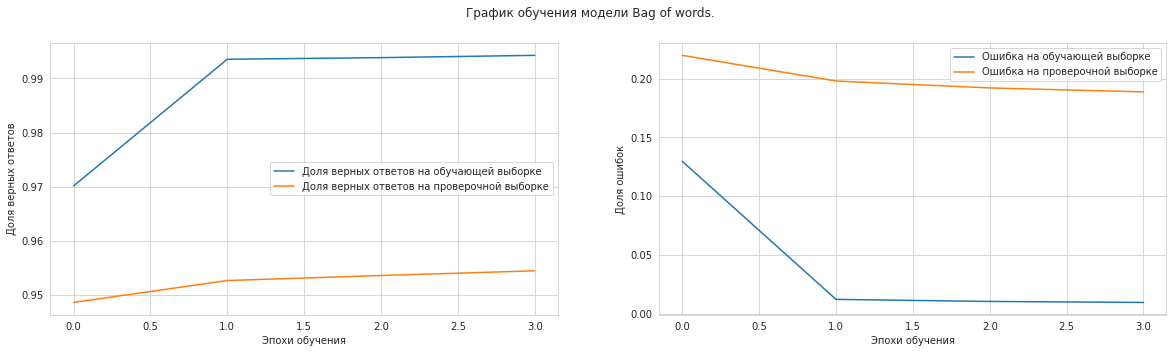

In [ ]:
compile_model(model1, x_train0, y_train, x_test0, y_test, epochs1, batch_size1, title1)

In [ ]:
eval_model(model1, x_test0, y_test, cls_names=class_list)

Писатель "Беляев" определен как "Беляев" c вероятностью 96% - ВЕРНО

Писатель "Булгаков" определен как "Булгаков" c вероятностью 98% - ВЕРНО

Писатель "Васильев" определен как "Васильев" c вероятностью 100% - ВЕРНО

Писатель "Гоголь" определен как "Гоголь" c вероятностью 87% - ВЕРНО

Писатель "Гончаров" определен как "Гончаров" c вероятностью 100% - ВЕРНО

Писатель "Горький" определен как "Горький" c вероятностью 99% - ВЕРНО

Писатель "Грибоедов" определен как "Грибоедов" c вероятностью 91% - ВЕРНО

Писатель "Достоевский" определен как "Достоевский" c вероятностью 99% - ВЕРНО

Писатель "Каверин" определен как "Каверин" c вероятностью 99% - ВЕРНО

Писатель "Катаев" определен как "Катаев" c вероятностью 98% - ВЕРНО

Писатель "Куприн" определен как "Куприн" c вероятностью 95% - ВЕРНО

Писатель "Лермонтов" определен как "Лермонтов" c вероятностью 76% - ВЕРНО

Писатель "Лесков" определен как "Лесков" c вероятностью 89% - ВЕРНО

Писатель "Носов" определен как "Носов" c вероятностью 100% - ВЕ

 Модель Bag of words достигла 95,4% точности на проверочной выборке и средняя точность распознавания составила 94,4%.

##Модель №2. Embedding

In [ ]:
# Используем Tokenizer для преобразования текстовых данных.

max_words_count = 20000                                                         # Максимальное количество слов используемое нейросетью для обучения.

filters = '!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff'                 # Исключаемые символы.
oov_token = 'неведомое слово'

tokenizer = Tokenizer(num_words=max_words_count, filters=filters,
                      lower=True, split=' ',
                      char_level=False, oov_token=oov_token)

tokenizer.fit_on_texts(text_train)                                              # Создаем словарь частотности.

# Преобразуем тексты в последовательности индексов.

train_seq = tokenizer.texts_to_sequences(text_train)
test_seq = tokenizer.texts_to_sequences(text_test)


In [ ]:
# Создаем обучающую выборку.
x_train, y_train = vectorize_sequence(train_seq, win_size, step)
print(f'Размерности обучающей выборки: {x_train.shape} и {y_train.shape}')

In [ ]:
# Создаем тестовую выборку.
x_test, y_test = vectorize_sequence(test_seq, win_size, step)
print(f'Размерности тестовой выборки: {x_test.shape} и {y_test.shape}')

In [ ]:
title2 = 'Embedding'
epochs2 = 4
batch_size2 = 128

In [ ]:
# Создаем модель со слоем Embedding.
model2 = Sequential()

model2.add(Embedding(max_words_count, 20, input_length=win_size))
model2.add(SpatialDropout1D(0.1))
model2.add(Flatten())
model2.add(BatchNormalization())
model2.add(Dense(200, activation='relu'))
model2.add(Dropout(0.1))
model2.add(BatchNormalization())

model2.add(Dense(class_count, activation='softmax'))

In [ ]:
model2.summary()                                                                # Выводим структуру модели.

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 1000, 20)          400000    
                                                                 
 spatial_dropout1d_7 (Spatia  (None, 1000, 20)         0         
 lDropout1D)                                                     
                                                                 
 flatten_7 (Flatten)         (None, 20000)             0         
                                                                 
 batch_normalization_14 (Bat  (None, 20000)            80000     
 chNormalization)                                                
                                                                 
 dense_14 (Dense)            (None, 200)               4000200   
                                                                 
 dropout_7 (Dropout)         (None, 200)              

Epoch 1/4
540/540 [==============================] - 38s 69ms/step - loss: 0.9192 - accuracy: 0.7556 - val_loss: 0.6906 - val_accuracy: 0.8279
Epoch 2/4
540/540 [==============================] - 37s 68ms/step - loss: 0.0092 - accuracy: 0.9996 - val_loss: 0.5190 - val_accuracy: 0.8532
Epoch 3/4
540/540 [==============================] - 37s 69ms/step - loss: 0.0043 - accuracy: 0.9997 - val_loss: 0.5365 - val_accuracy: 0.8493
Epoch 4/4
540/540 [==============================] - 38s 70ms/step - loss: 0.0025 - accuracy: 0.9999 - val_loss: 0.5263 - val_accuracy: 0.8532

Точность на проверочной выборке на последней эпохе: 85.3%


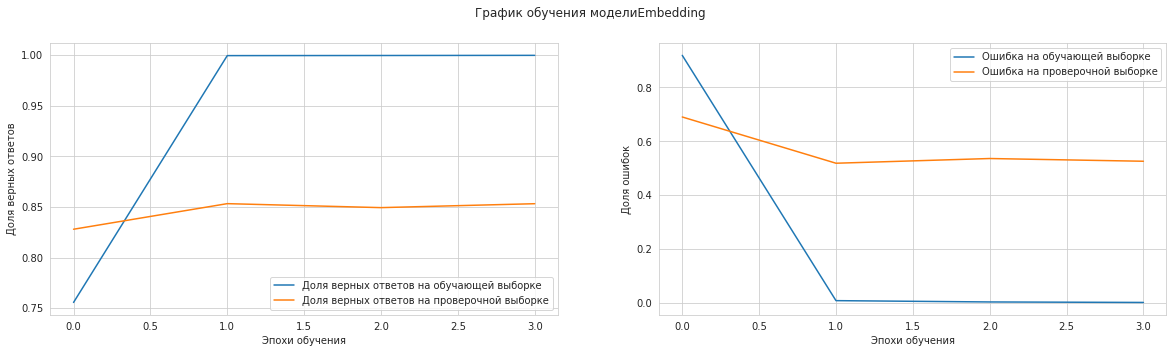

In [ ]:
compile_model(model2, x_train, y_train, x_test, y_test, epochs2, batch_size2, title2)

In [ ]:
eval_model(model2, x_test, y_test, cls_names=class_list)

Писатель "Беляев" определен как "Беляев" c вероятностью 74% - ВЕРНО

Писатель "Булгаков" определен как "Булгаков" c вероятностью 85% - ВЕРНО

Писатель "Васильев" определен как "Васильев" c вероятностью 100% - ВЕРНО

Писатель "Гоголь" определен как "Гоголь" c вероятностью 62% - ВЕРНО

Писатель "Гончаров" определен как "Гончаров" c вероятностью 96% - ВЕРНО

Писатель "Горький" определен как "Горький" c вероятностью 78% - ВЕРНО

Писатель "Грибоедов" определен как "Грибоедов" c вероятностью 79% - ВЕРНО

Писатель "Достоевский" определен как "Достоевский" c вероятностью 84% - ВЕРНО

Писатель "Каверин" определен как "Каверин" c вероятностью 91% - ВЕРНО

Писатель "Катаев" определен как "Катаев" c вероятностью 81% - ВЕРНО

Писатель "Куприн" определен как "Куприн" c вероятностью 57% - ВЕРНО

Писатель "Лермонтов" определен как "Лермонтов" c вероятностью 73% - ВЕРНО

Писатель "Лесков" определен как "Лесков" c вероятностью 80% - ВЕРНО

Писатель "Носов" определен как "Носов" c вероятностью 93% - ВЕРН

Модель Embedding - 85.3% точность на проверочной выборке и 82% средняя точность распознавания.